In [1]:
import pandas as pd
import torch

In [2]:
df = pd.read_csv('거제도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22104,2003-01-01,8.5,1023.8,52.0,2.9,15.9,2.0,0.7,1.0,3.3,7.6,9.5
1,22104,2003-01-02,5.6,1028.7,63.0,4.4,16.6,1.9,0.7,0.8,2.2,8.2,10.9
2,22104,2003-01-03,7.5,1018.6,64.0,5.2,16.9,1.8,0.6,0.8,3.1,9.2,11.8
3,22104,2003-01-04,10.3,1019.7,57.0,-0.6,16.7,2.1,0.7,0.9,2.8,12.5,75.0
4,22104,2003-01-05,8.8,1027.0,50.0,-2.6,15.8,2.0,0.7,0.8,2.6,9.7,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,22104,2022-12-27,6.7,1026.1,44.0,7.4,15.7,1.9,1.2,1.5,2.4,5.4,6.8
7054,22104,2022-12-28,6.7,1027.9,54.0,6.3,15.3,1.5,1.0,1.2,1.9,4.5,5.1
7055,22104,2022-12-29,6.8,1031.0,58.0,4.8,15.0,1.3,0.9,1.2,1.9,4.1,5.3
7056,22104,2022-12-30,5.4,1030.7,55.0,5.7,15.1,1.0,0.7,0.9,1.5,3.9,4.4


In [3]:
df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 상대습도(%)': 'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)','Moisture(%)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C),Moisture(%)
date,,,,
2003-01-01,1023.8,2.9,15.9,52.0
2003-01-02,1028.7,4.4,16.6,63.0
2003-01-03,1018.6,5.2,16.9,64.0
2003-01-04,1019.7,-0.6,16.7,57.0
2003-01-05,1027.0,-2.6,15.8,50.0
...,...,...,...,...
2022-12-27,1026.1,7.4,15.7,44.0
2022-12-28,1027.9,6.3,15.3,54.0
2022-12-29,1031.0,4.8,15.0,58.0


In [4]:
import numpy as np

df = df[['Stemp(°C)']]

df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan

df = df.dropna()
df

C:\Users\admin\AppData\Local\Temp\ipykernel_7860\2087265369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan


,Stemp(°C)
date,
2003-01-01,15.9
2003-01-02,16.6
2003-01-03,16.9
2003-01-04,16.7
2003-01-05,15.8
...,...
2022-12-27,15.7
2022-12-28,15.3
2022-12-29,15.0


In [5]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2003-01-31    16.141935
2003-02-28    17.575000
2003-03-31    17.146429
2003-04-30    16.993333
2003-05-31    17.165000
                ...    
2022-08-31    25.603226
2022-09-30    24.853333
2022-10-31    22.393548
2022-11-30    20.133333
2022-12-31    17.177419
Freq: M, Name: Stemp(°C), Length: 240, dtype: float64

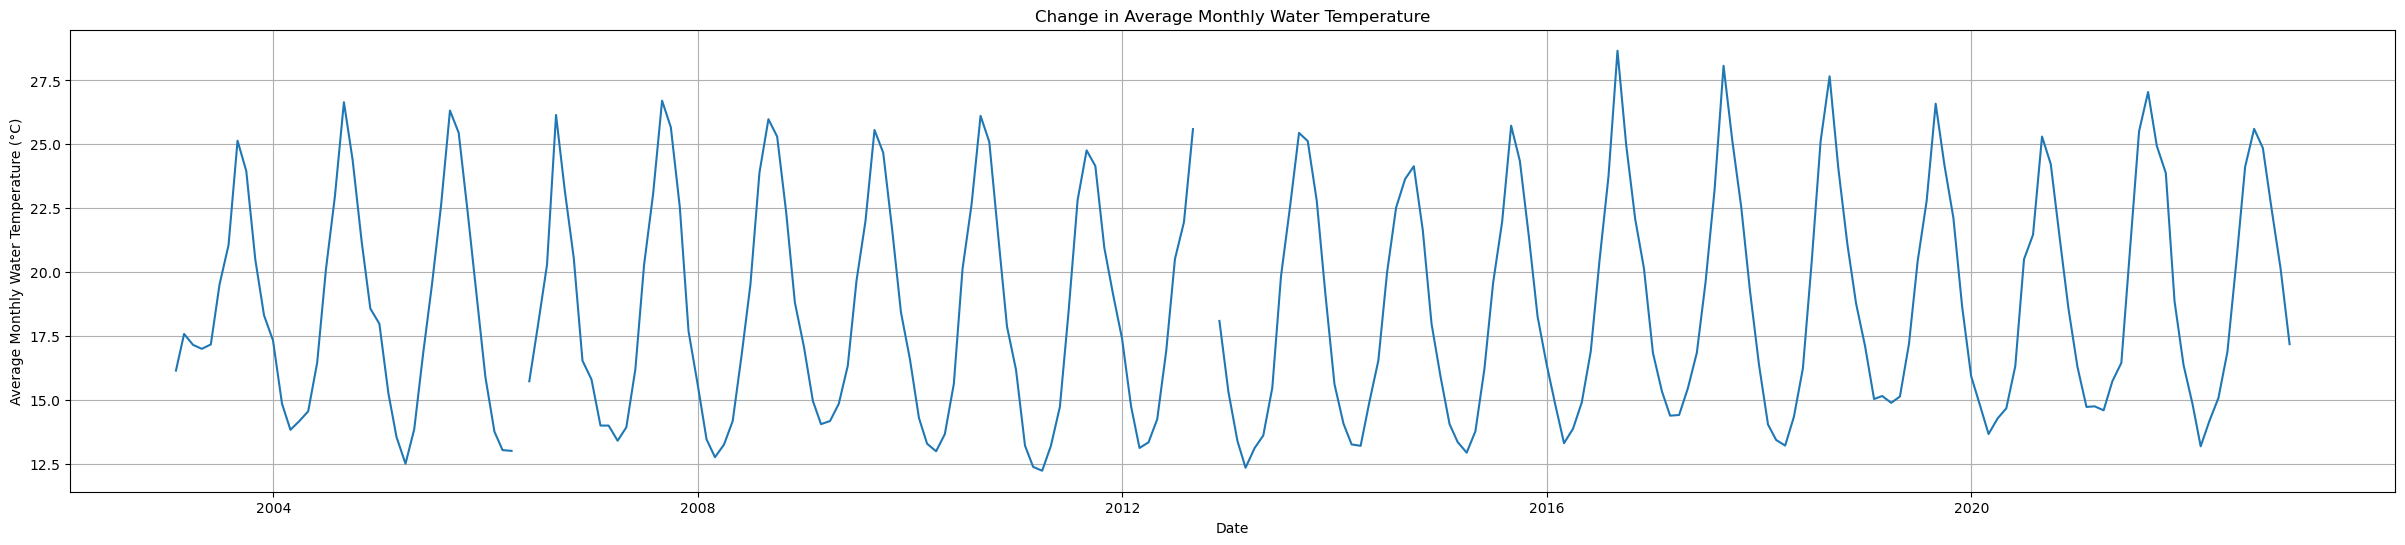

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

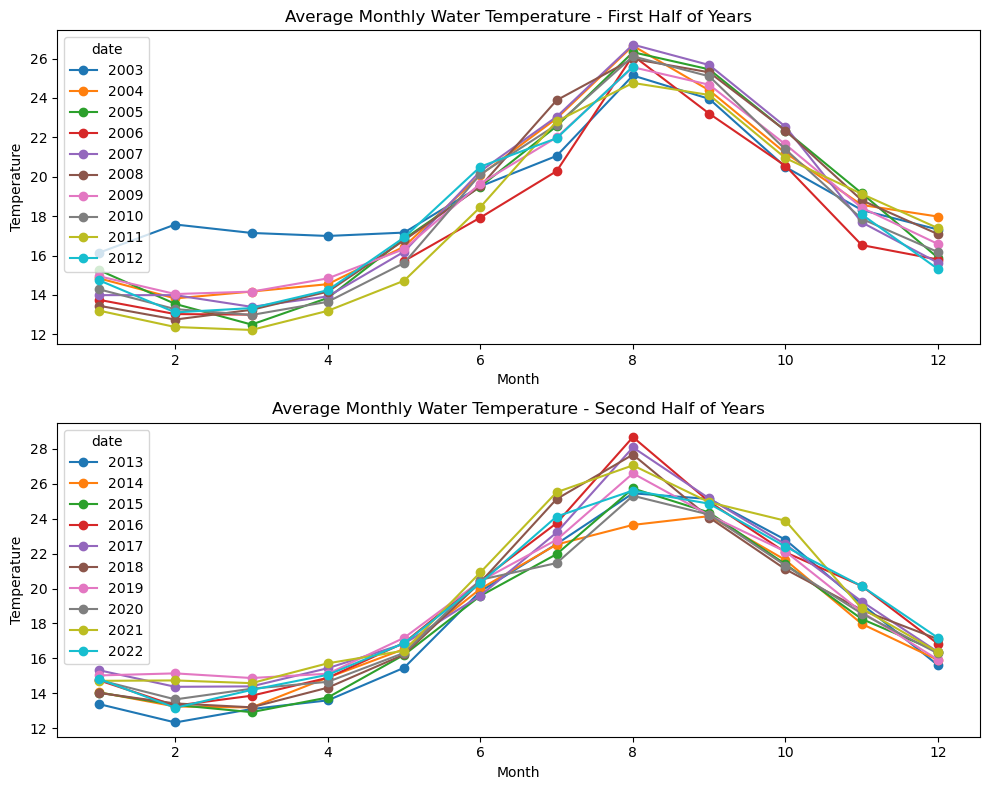

In [7]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


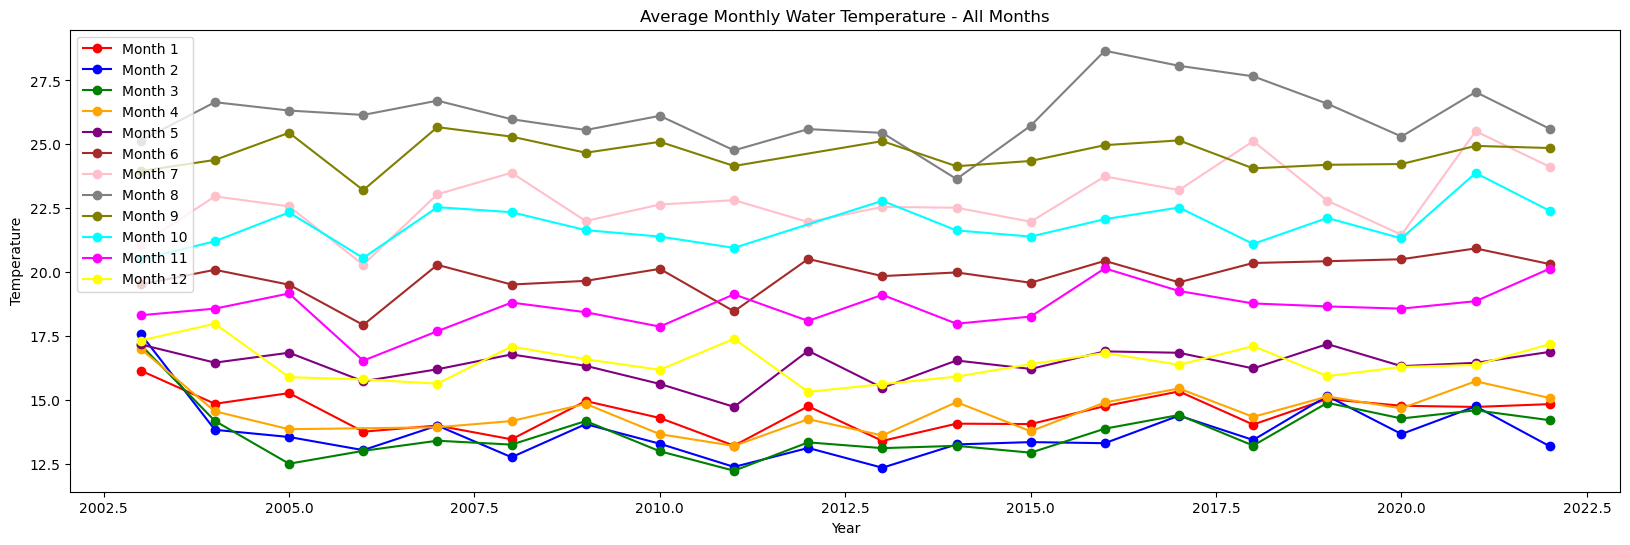

In [8]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(20, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


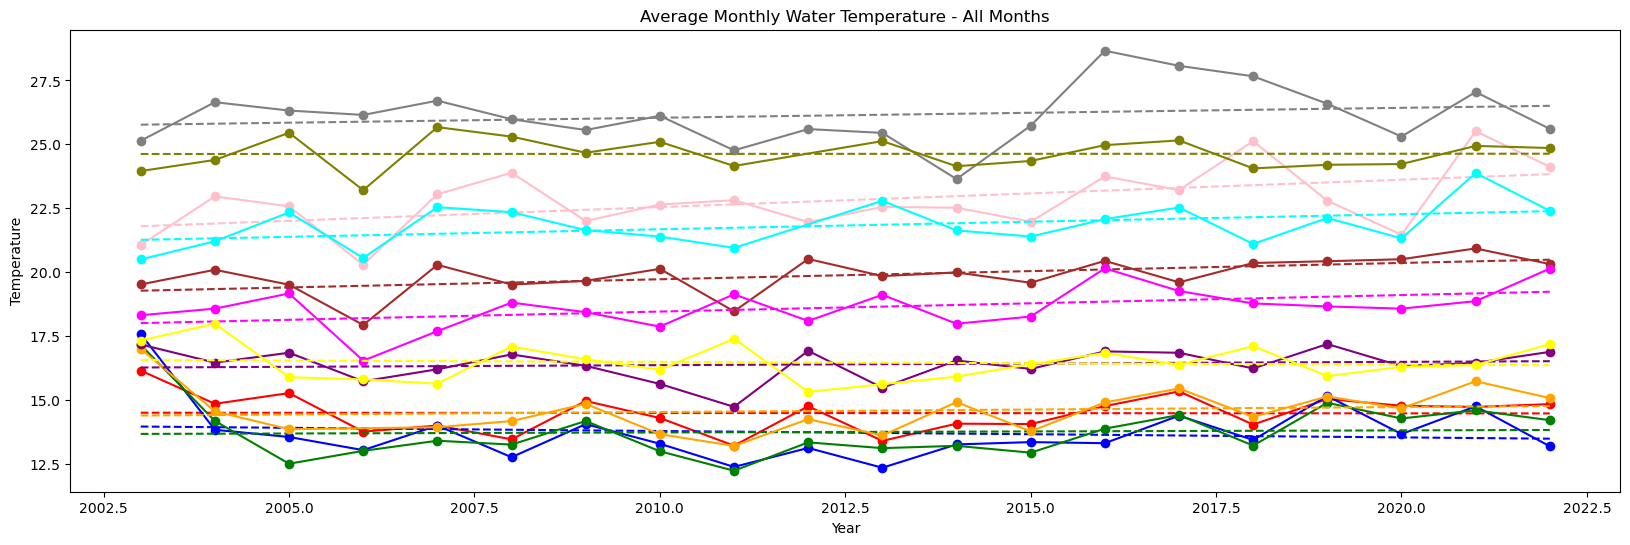

In [9]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(20, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 7 - Slope: 0.10727951374852909
2. Month 11 - Slope: 0.0645975765656865
3. Month 6 - Slope: 0.06389437946606738
4. Month 10 - Slope: 0.05906649231382572
5. Month 8 - Slope: 0.038814013969852366
6. Month 4 - Slope: 0.019513845232749582
7. Month 5 - Slope: 0.012963977280662942
8. Month 3 - Slope: 0.008087644225771747
9. Month 9 - Slope: 0.0005576760313430502
10. Month 1 - Slope: -0.0014482173174872749
11. Month 12 - Slope: -0.010603268460361156
12. Month 2 - Slope: -0.025000487508364158


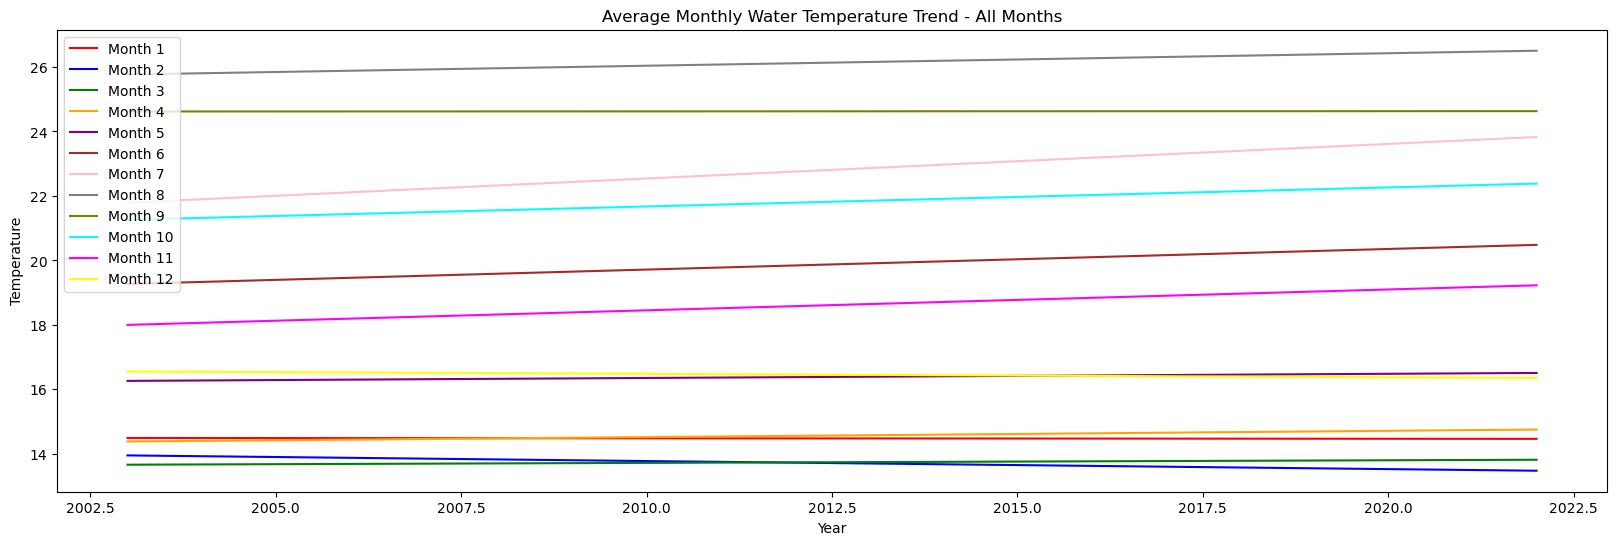

In [10]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(20, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


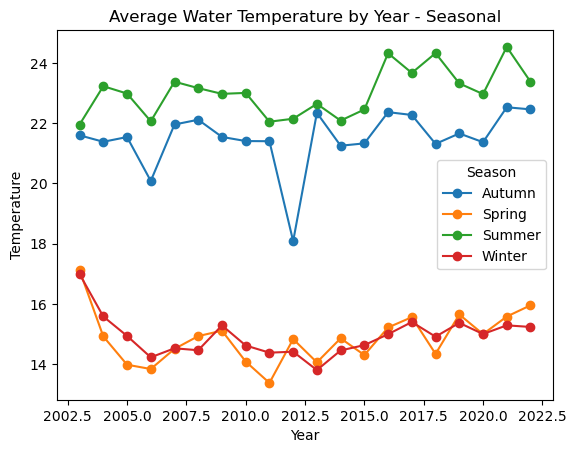

In [11]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

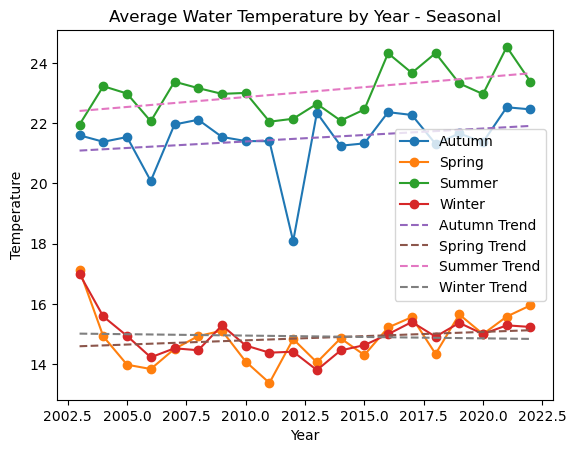

In [12]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Summer - Slope: 0.06576952387223792
2. Autumn - Slope: 0.043067890999906856
3. Spring - Slope: 0.02800854849841237
4. Winter - Slope: -0.009202707389134314


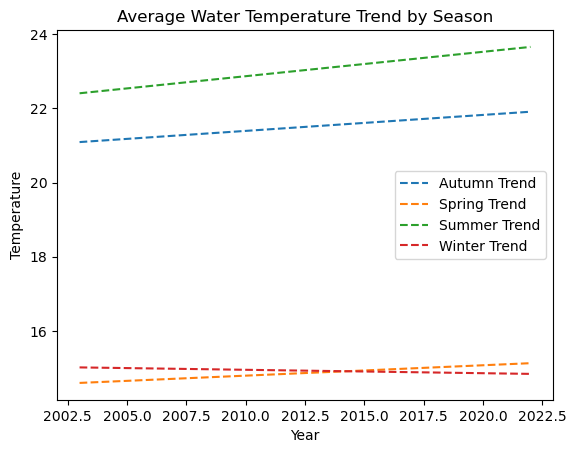

In [13]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()


In [14]:
df = pd.read_csv('거제도.csv', encoding='cp949')

df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 상대습도(%)': 'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)','Moisture(%)']] # Column 재정리
df.dropna(inplace=True)
df

,Apress(hPa),Atemp(°C),Stemp(°C),Moisture(%)
date,,,,
2003-01-01,1023.8,2.9,15.9,52.0
2003-01-02,1028.7,4.4,16.6,63.0
2003-01-03,1018.6,5.2,16.9,64.0
2003-01-04,1019.7,-0.6,16.7,57.0
2003-01-05,1027.0,-2.6,15.8,50.0
...,...,...,...,...
2022-12-27,1026.1,7.4,15.7,44.0
2022-12-28,1027.9,6.3,15.3,54.0
2022-12-29,1031.0,4.8,15.0,58.0


In [15]:
correlations = df.corr()['Stemp(°C)']

for column, correlation in correlations.items():
    if column != 'Stemp(°C)':
        print(f"Correlation between Stemp(°C) and {column}: {correlation}")

Correlation between Stemp(°C) and Apress(hPa): -0.4745704691378237
Correlation between Stemp(°C) and Atemp(°C): 0.8400949061923455
Correlation between Stemp(°C) and Moisture(%): 0.4643273019880732
